EE 502 P: Analytical Methods for Electrical Engineering
# 8. Probability
## Prof. Eric Klavins, Electrical and Computer Engineering
### 25 September, 2019
Copyright &copy; 2019, University of Washington

Topics:
- Examples (coins, dice, waiting, Bolztman)
- Sample spaces
- PDFs and CDFs
- Random Variables
- Expected value, moments, and variances
- Joints and marginals
- Entropy and information
- Divergences and distances
- Markov chains and processes (and linear algebra)
- Markov decision processes

### Visualizing the Page Rank Algorithm

In [208]:
# Create a Random Graph

n = 100
G = nx.Graph()
G.add_nodes_from(range(n))
G.add_edges_from([
    (np.random.randint(n),np.random.randint(n)) 
    for _ in range(int(1.1*n))
])

In [209]:
# Find the ranking of all nodes, and the max ranged node

vals = np.array(list(nx.pagerank(G).values()))
m = np.argmax(vals)
max(vals),m

(0.023662036660496318, 48)

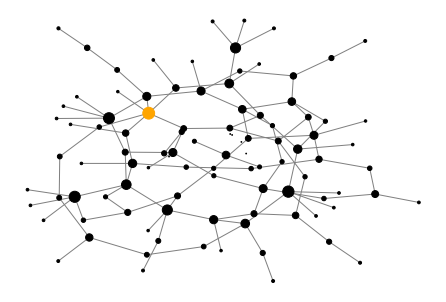

In [249]:
# Draw the network

nx.draw(G, 
        with_labels=False, 
        node_color=['black' if k != m else 'orange' for k in range(n)],
        edge_color='gray',
        node_size=(500*vals)**2,
        node_shape='o',
        pos=nx.kamada_kawai_layout(G))

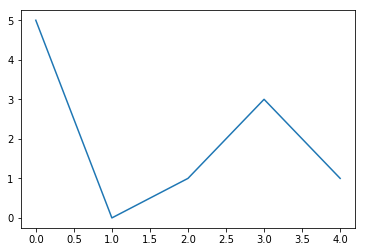

In [260]:
M = nx.laplacian_matrix(G)
M = np.matrix(M.toarray())
eigs = np.linalg.eigvals(M)
mags = [abs(e) for e in eigs]
y = plt.plot(mags)